In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [40]:
# Read in the data
df = pd.read_excel('../data/Maersk_Supply_Combined.xlsx')

In [41]:
# Basic statistics
print("Basic Statistics:")
display(df.describe(include='all'))

Basic Statistics:


,Site,Vessel_Name,Wo_No,Fault_Rep_Flag,Pm_No,Cf$_Pm_Interval,Standard_Job,Creation_Date,Due_Date,Actual_Finish,...,EBS5,EBS6,EBS7,DamageType,DamageDescriptor,Directive,Job_Description,Work_Description,Completion_Note,Action_Taken
count,2229,2229,2.229000e+03,2229.0,0.0,0.0,0.0,2229,1473,2229,...,2222.0,2222.0,2221.0,2069,2069,2228,0.0,2088,2094,1846
unique,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,5,22,1847,NaN,1938,1828,1300
top,I04,Maersk Implementer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,External Influence,Blockage / Plugged,Change,NaN,Fault Report created from Round (WO)11710025604,Filters replaced.,Replaced with new
freq,610,610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2221.0,NaN,NaN,528,436,51,NaN,12,17,157
mean,NaN,NaN,1.152152e+10,1.0,NaN,NaN,NaN,2022-05-11 09:11:38.534320384,2022-06-09 02:38:57.679565568,2022-06-18 19:12:53.831314432,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,3.200000e+01,1.0,NaN,NaN,NaN,2020-06-24 20:36:52,2020-01-19 00:00:00,2020-01-19 00:00:00,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.141005e+10,1.0,NaN,NaN,NaN,2021-06-18 16:20:13,2021-07-01 21:26:43,2021-07-26 21:10:09,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.161001e+10,1.0,NaN,NaN,NaN,2022-04-16 17:42:41,2022-05-22 00:00:00,2022-06-13 10:00:00,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.171000e+10,1.0,NaN,NaN,NaN,2023-04-08 21:53:58,2023-05-14 00:00:00,2023-05-13 16:25:15,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,1.171004e+10,1.0,NaN,NaN,NaN,2024-04-29 16:38:27,2025-07-01 00:00:00,2024-04-29 16:41:27,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Site                     0
Vessel_Name              0
Wo_No                    0
Fault_Rep_Flag           0
Pm_No                 2229
Cf$_Pm_Interval       2229
Standard_Job          2229
Creation_Date            0
Due_Date               756
Actual_Finish            0
Object_Id                0
Object                   0
Maker_Name            1026
Group                    0
Object_Type            857
Type                  1194
Criticality           1053
Department               0
Work_Type                0
Running_Hour_Total    2032
Symptom                 84
Error_Cause            340
Cause_Details          676
Error_Class            346
Discovery               81
Performed_Action        81
Total_Hours            230
Total_Cost             615
Used_Parts             617
Used_Qty               617
Returned_Parts        2229
Returned_Qty          2229
System                   1
Component Name          26
CaseReviewed             0
EBSSelection             0
EBSCode    

In [43]:
# Make sure that we are only capturing cases where 'EBS1' is in our review status categories
df = df[(df['EBS1'].notna()) & (df['EBS1'] != ' ')]
df['EBS1'] = df['EBS1'].apply(lambda x: x.strip())

# Filter the dataframe for the selected columns
df = df[['Object', 'Group', 'Object_Type', 'Directive', 'Work_Description', 'Completion_Note', 'EBS1']]

# Fill the N/A cells, lowercase the dataframe, and combine columns and create a combined column
df = df.fillna('')
for col in df.columns:
    df[col] = df[col].str.lower()
df['combined'] = df.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Replace the carriage return characters with a space
for col in df.columns:
    df[col] = df[col].str.replace('_x000d_\n', ' ', regex=False)

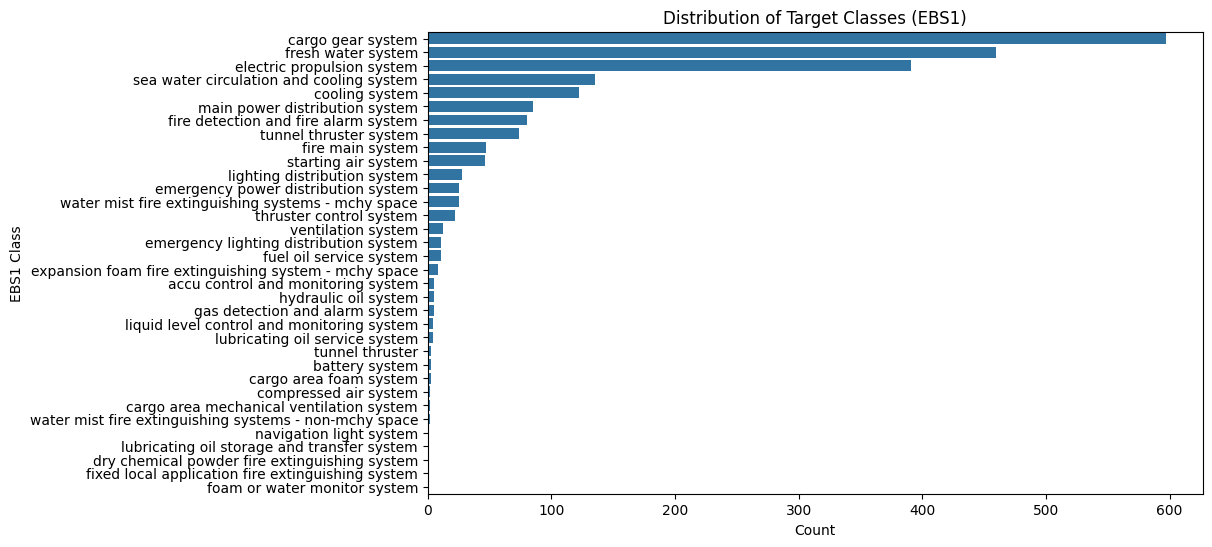

In [44]:
# Distribution of target classes
plt.figure(figsize=(10, 6))
sns.countplot(y='EBS1', data=df, order=df['EBS1'].value_counts().index)
plt.title('Distribution of Target Classes (EBS1)')
plt.xlabel('Count')
plt.ylabel('EBS1 Class')
plt.show()

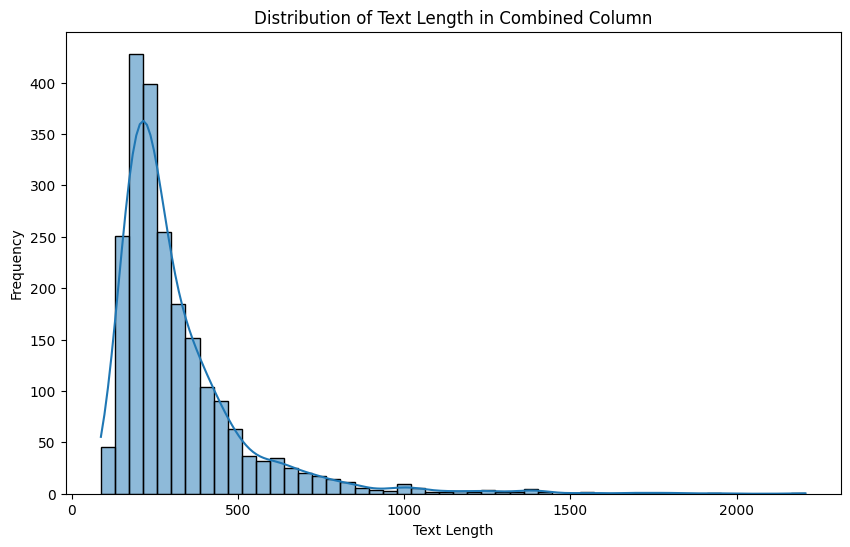

In [45]:
# Text length distribution in the combined column
df['text_length'] = df['combined'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Length in Combined Column')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

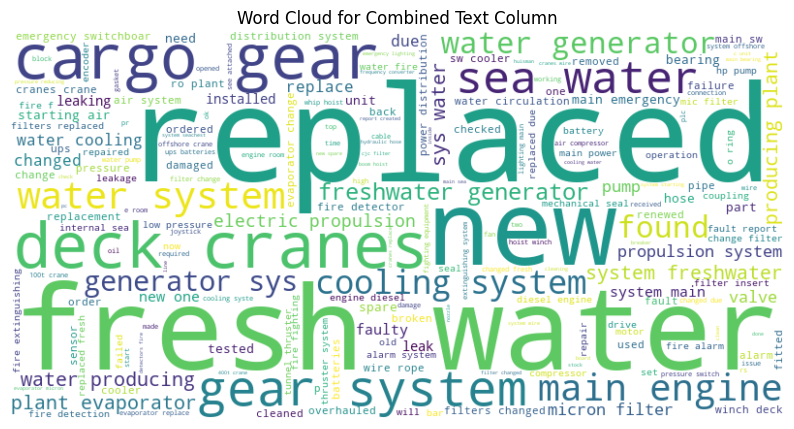

In [46]:
# Generate word cloud for the combined text column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['combined']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Combined Text Column')
plt.show()

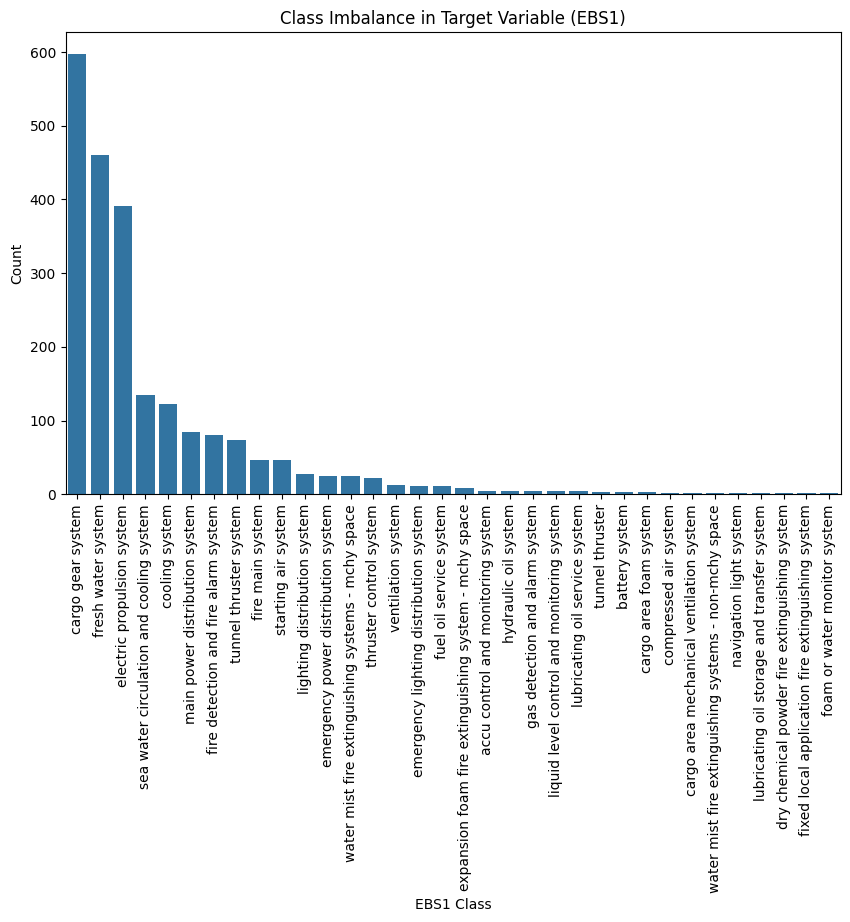

In [48]:
# Class Imbalance for Target Variable
plt.figure(figsize=(10, 6))
sns.countplot(x='EBS1', data=df, order=df['EBS1'].value_counts().index)
plt.title('Class Imbalance in Target Variable (EBS1)')
plt.xlabel('EBS1 Class')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\syeda\AppData\Local\Temp\ipykernel_27868\506863918.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')


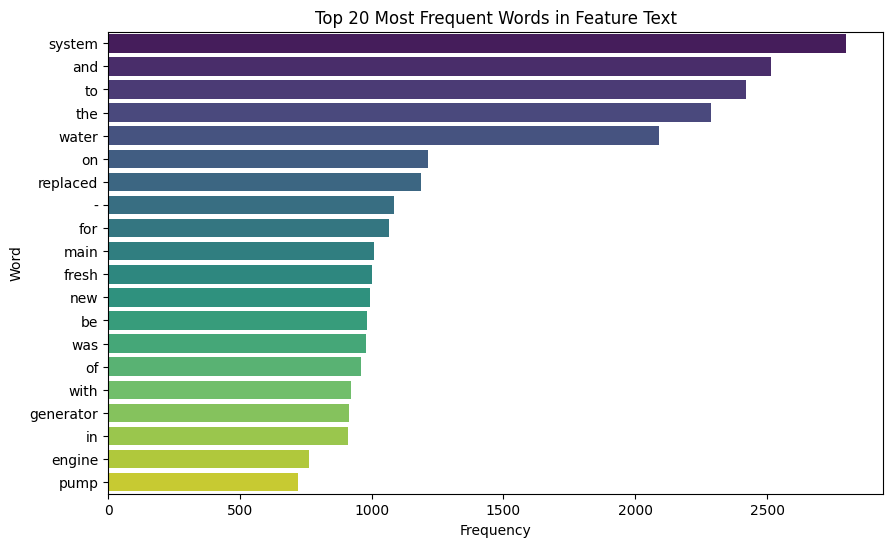

In [47]:
# Visualize the top N most frequent words in the combined text column
N = 20
all_words = ' '.join([text for text in df['combined']])
all_words = all_words.split()
word_freq = pd.Series(all_words).value_counts().head(N)

plt.figure(figsize=(10, 6))
sns.barplot(x=word_freq.values, y=word_freq.index, palette='viridis')
plt.title('Top 20 Most Frequent Words in Feature Text')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

C:\Users\syeda\AppData\Local\Temp\ipykernel_27868\2281303637.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='viridis')


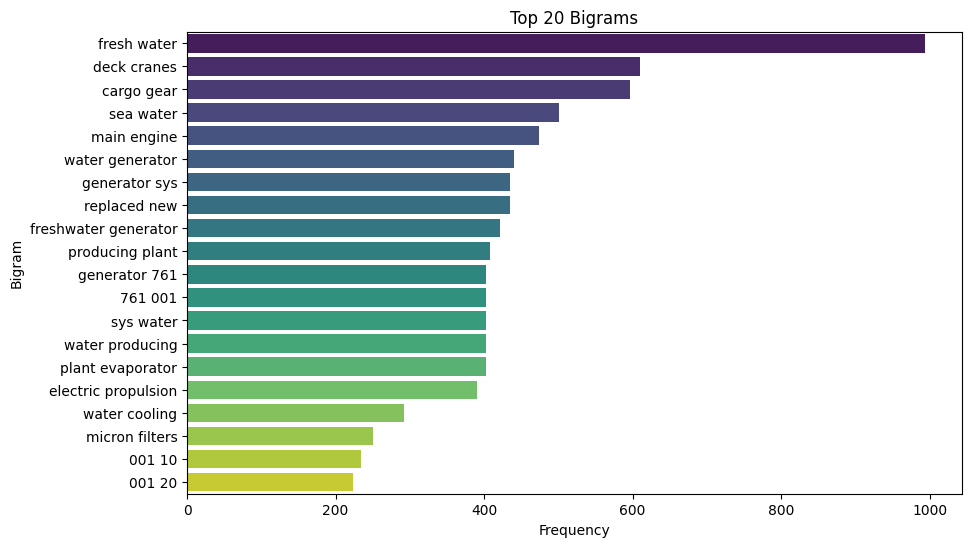

C:\Users\syeda\AppData\Local\Temp\ipykernel_27868\2281303637.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Trigram', data=trigrams_df, palette='viridis')


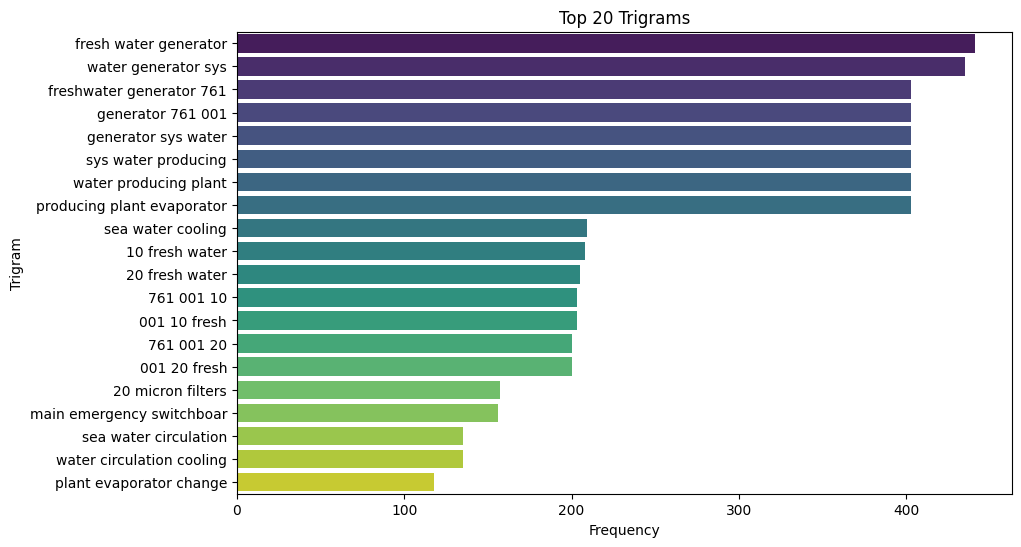

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
# Top N-grams (Bigrams and Trigrams)
def get_top_ngrams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_20_bigrams = get_top_ngrams(df['combined'], n=20, ngram_range=(2, 2))
top_20_trigrams = get_top_ngrams(df['combined'], n=20, ngram_range=(3, 3))

bigrams_df = pd.DataFrame(top_20_bigrams, columns=['Bigram', 'Frequency'])
trigrams_df = pd.DataFrame(top_20_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df, palette='viridis')
plt.title('Top 20 Bigrams')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Trigram', data=trigrams_df, palette='viridis')
plt.title('Top 20 Trigrams')
plt.show()